In [1]:
from dask.distributed import Client, LocalCluster
import dask.bag as db

In [2]:
dask_cluster = LocalCluster(n_workers=20, threads_per_worker=1)
dask_client = Client(dask_cluster)

In [3]:
dask_client

Client Scheduler: tcp://127.0.0.1:39607 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 20 Cores: 20 Memory: 33.60 GB


# Load the dictionary

In [4]:
from tibert.dict import TibetanDict, TibetanEncoding

In [5]:
dict_ = TibetanDict(None, glob_override="../../tibert_data/dictionaries/for_aug/*", default_encoding=TibetanEncoding.UNICODE)

In [6]:
len(dict_)

65166

In [7]:
bo_lines, en_lines = [], []

In [8]:
for bo, ens in dict_.items():
    if not bo[-1] == '་':
        bo += '་'
    for en in ens:
        bo_lines.append(bo)
        en_lines.append(en)

In [9]:
len(bo_lines), len(en_lines)

(106470, 106470)

In [10]:
bo_test = "ལེ་བརྒན་"

In [11]:
dict_[bo_test]

['violet']

# Find well-defined words

In [14]:
en_lines[:20]

['central channel, see also {a wa dhU ti}',
 'yellow, beleric, and emblic myrobalan',
 'Avataramukha',
 "{'jug sgo}",
 'carelessly',
 'Syn {dbab pa}. Syn {bstim}',
 'good, tolerable, middling',
 'uncle',
 'to bark',
 'I, myself (Milarepa uses about himself)',
 'elder sister, women',
 "sister-in-law {jo jo'i skye dman}, [older, elder] sister, wife of a cousin",
 'us, we',
 'it is certain',
 'of course!',
 'Ache Lhamo',
 'an elder sister, wife, mistress, madam',
 'actor, actress',
 'Achung Namdzong, in Domey',
 "small 'a'"]

In [15]:
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
df_dict = {
    "bo": [],
    "len_ens": [],
    "num_spaces": [],
    "num_commas": [],
    "processed": []
}
for bo, ens in tqdm(dict_.items()):
    df_dict['bo'].append(bo)
    df_dict['len_ens'].append(max([len(en) for en in ens]))
    df_dict['num_spaces'].append(sum([en.count(' ') for en in ens]))
    df_dict['num_commas'].append(sum([en.count(',') for en in ens]))

    ens = [en_split.strip() for en in ens for en_split in en.split(',')]
    en_lens = list(map(len, ens))
    df_dict['processed'].append(ens[en_lens.index(min(en_lens))])
dict_freq_df = pd.DataFrame(df_dict)

<AxesSubplot:>

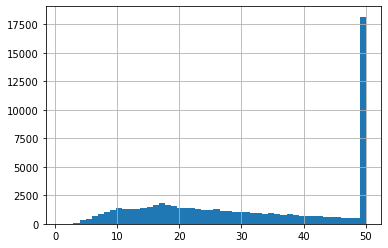

In [17]:
dict_freq_df.len_ens.map(lambda x: min(x, 50)).hist(bins=50)

In [18]:
len(dict_freq_df[dict_freq_df.len_ens < 20])

19529

In [19]:
import random

In [20]:
dict_procd = dict(zip(dict_freq_df.bo.tolist(), dict_freq_df.processed.tolist()))

In [28]:
bo_word = random.choice(dict_freq_df.bo.tolist())
bo_word, dict_[bo_word], dict_procd[bo_word]

('བྱོན་པ',
 ['departed',
  'departure, to approach',
  "pf. of {'byon pa}",
  'come, arrive',
  'a procession',
  "the arrival {bcom ldan [t.pg.61]'das byon pa mthong nas} she saw the arrival of the Bhagavan"],
 'come')